In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("employee_experience_survey_data.csv")

In [4]:
df.columns

Index(['Name', 'Age Bracket', 'Gender', 'Ethnicity', 'Job Title', 'Department',
       'Date Survey Completed', 'Job Satisfaction', 'Work-Life Balance',
       'Management Support', 'Team Collaboration', 'Workload Fairness',
       'Career Development Opportunities', 'Workplace Inclusivity',
       'Company Communication', 'Compensation Satisfaction', 'Job Security',
       'Overall Engagement'],
      dtype='object')

In [5]:
df.head(1)

,Name,Age Bracket,Gender,Ethnicity,Job Title,Department,Date Survey Completed,Job Satisfaction,Work-Life Balance,Management Support,Team Collaboration,Workload Fairness,Career Development Opportunities,Workplace Inclusivity,Company Communication,Compensation Satisfaction,Job Security,Overall Engagement
0,John Doe,25-34,Female,Asian,Product Manager,Product Development,2024-10-05,Disagree,Strongly Agree,Neutral,Neutral,Neutral,Disagree,Agree,Strongly Agree,Strongly Agree,Agree,Strongly Agree


In [6]:
df.isnull().sum()

Name                                0
Age Bracket                         0
Gender                              0
Ethnicity                           0
Job Title                           0
Department                          0
Date Survey Completed               0
Job Satisfaction                    0
Work-Life Balance                   0
Management Support                  0
Team Collaboration                  0
Workload Fairness                   0
Career Development Opportunities    0
Workplace Inclusivity               0
Company Communication               0
Compensation Satisfaction           0
Job Security                        0
Overall Engagement                  0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
import numpy as np
likert_mapping = {
    'Strongly Disagree': 1,
    'Disagree': 2,
    'Neutral': 3,
    'Agree': 4,
    'Strongly Agree': 5
}
# Apply mapping to relevant columns
df['Job Satisfaction Num'] = df['Job Satisfaction'].map(likert_mapping)
df['Overall Engagement Num'] = df['Overall Engagement'].map(likert_mapping)

In [9]:
desc_stats = {
    'Mean' : [df['Job Satisfaction Num'].mean() , df['Overall Engagement Num'].mean()],
    "Meadian" : [df['Job Satisfaction Num'].median() , df['Overall Engagement Num'].median()],
    "Mode"     : [df['Job Satisfaction Num'].mode().iloc[0] , df['Overall Engagement Num'].mode().iloc[0]],
    "Std" : [df['Job Satisfaction Num'].std() , df['Overall Engagement Num'].std()]
}

In [10]:
desc_df = pd.DataFrame(desc_stats , index = ['Job Satisfaction', 'Overall Engagement'])

In [11]:
desc_df

,Mean,Meadian,Mode,Std
Job Satisfaction,3.0,3.0,2,1.309307
Overall Engagement,3.4,3.0,3,1.298351


# Interpretation:
Job Satisfaction:

Average rating is 3.0 (Neutral)

Most frequent response is 2 (Disagree)

Indicates slight dissatisfaction overall

Overall Engagement:

Mean is 3.4 (between Neutral and Agree)

Median is 3, but slightly higher satisfaction compared to Job Satisfaction



In [12]:
df.head(1)

,Name,Age Bracket,Gender,Ethnicity,Job Title,Department,Date Survey Completed,Job Satisfaction,Work-Life Balance,Management Support,Team Collaboration,Workload Fairness,Career Development Opportunities,Workplace Inclusivity,Company Communication,Compensation Satisfaction,Job Security,Overall Engagement,Job Satisfaction Num,Overall Engagement Num
0,John Doe,25-34,Female,Asian,Product Manager,Product Development,2024-10-05,Disagree,Strongly Agree,Neutral,Neutral,Neutral,Disagree,Agree,Strongly Agree,Strongly Agree,Agree,Strongly Agree,2,5


In [13]:
map_columns = [
    'Job Satisfaction',
    'Work-Life Balance',
    'Management Support',
    'Team Collaboration',
    'Workload Fairness',
    'Career Development Opportunities',
    'Workplace Inclusivity',
    'Company Communication',
    'Compensation Satisfaction',
    'Job Security',
    'Overall Engagement'
]
for col in map_columns :
    df[col + "Num"] = df[col].map(likert_mapping)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
avg_by_job =  df.groupby("Age Bracket")["Job Satisfaction Num"].mean().sort_index()
Department_by = df.groupby("Department")["Job Satisfaction Num"].mean().sort_index()

<Axes: xlabel='Age Bracket', ylabel='Job Satisfaction Num'>

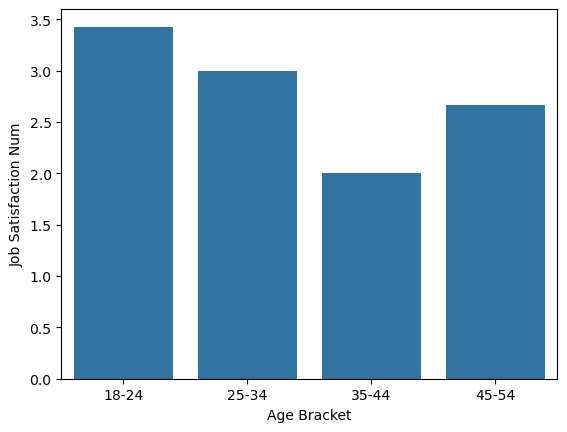

In [16]:
sns.barplot(df.groupby("Age Bracket")["Job Satisfaction Num"].mean().sort_index())

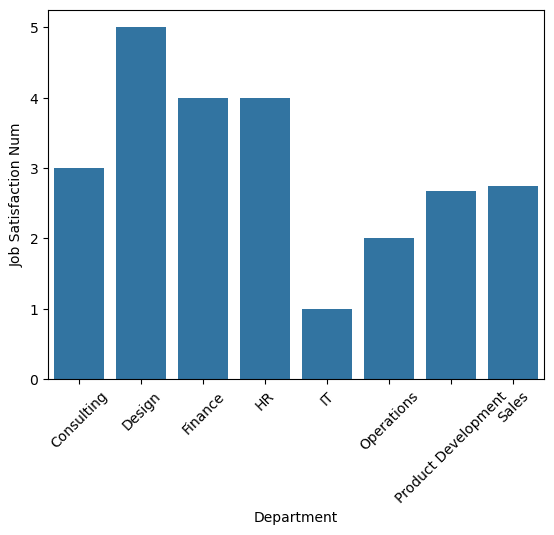

In [17]:
sns.barplot(df.groupby("Department")["Job Satisfaction Num"].mean().sort_index())
plt.xticks(rotation=45)
plt.show()

In [18]:
df.columns

Index(['Name', 'Age Bracket', 'Gender', 'Ethnicity', 'Job Title', 'Department',
       'Date Survey Completed', 'Job Satisfaction', 'Work-Life Balance',
       'Management Support', 'Team Collaboration', 'Workload Fairness',
       'Career Development Opportunities', 'Workplace Inclusivity',
       'Company Communication', 'Compensation Satisfaction', 'Job Security',
       'Overall Engagement', 'Job Satisfaction Num', 'Overall Engagement Num',
       'Job SatisfactionNum', 'Work-Life BalanceNum', 'Management SupportNum',
       'Team CollaborationNum', 'Workload FairnessNum',
       'Career Development OpportunitiesNum', 'Workplace InclusivityNum',
       'Company CommunicationNum', 'Compensation SatisfactionNum',
       'Job SecurityNum', 'Overall EngagementNum'],
      dtype='object')

In [19]:
# Analyze Work-Life Balance by Gender and by Ethnicity
wlb_by_gender = df.groupby('Gender')['Work-Life BalanceNum'].mean().sort_values(ascending=False)
wlb_by_ethnicity = df.groupby('Ethnicity')['Work-Life BalanceNum'].mean().sort_values(ascending=False)

# Analyze Compensation Satisfaction by Gender and by Ethnicity
comp_by_gender = df.groupby('Gender')['Compensation Satisfactionnum'].mean().sort_values(ascending=False)
comp_by_ethnicity = df.groupby('Ethnicity')['Compensation Satisfactionnum'].mean().sort_values(ascending=False)

wlb_by_gender, wlb_by_ethnicity, comp_by_gender, comp_by_ethnicity


KeyError: 'Column not found: Compensation Satisfactionnum'

# Step 3: Inferential Statistics

<Axes: xlabel='count', ylabel='Department'>

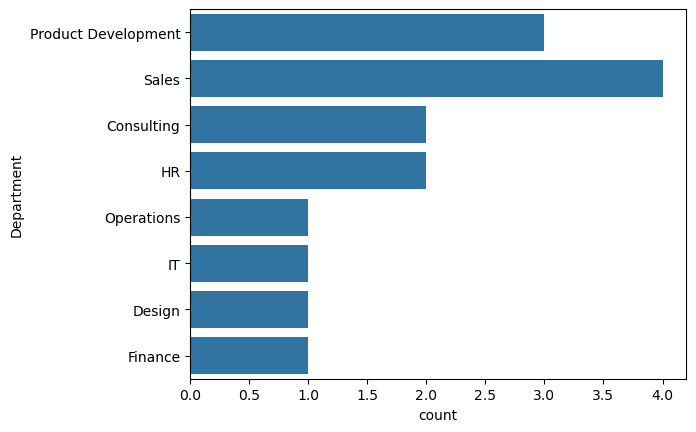

In [20]:
sns.countplot(df["Department"])

In [1]:
df.columns

NameError: name 'df' is not defined

In [30]:
from scipy.stats import ttest_ind
it_scores = df[df['Department'] == 'IT']['Job Satisfaction Num'].dropna()
hr_scores = df[df['Department'] == 'HR']['Job Satisfaction Num'].dropna()
t_stat, p_value = ttest_ind(it_scores, hr_scores, equal_var=False)

# Sample sizes
n_it = len(it_scores)
n_hr = len(hr_scores)

t_stat, p_value, n_it, n_hr

(nan, nan, 1, 2)

Presentation:

"A t-test could not be conducted between IT and HR due to insufficient sample size in the IT department (only 1 respondent). Therefore, no statistically valid conclusion can be drawn for this comparison."



In [33]:
from scipy.stats import ttest_ind
it_scores = df[df['Department'] == 'Sales']['Job Satisfaction Num'].dropna()
hr_scores = df[df['Department'] == 'Product Development']['Job Satisfaction Num'].dropna()
t_stat, p_value = ttest_ind(it_scores, hr_scores, equal_var=False)

# Sample sizes
n_it = len(it_scores)
n_hr = len(hr_scores)

t_stat, p_value, n_it, n_hr

(0.08304547985374013, 0.9370597192475594, 4, 3)

# p = 0.937 > 0.05 ⇒ We fail to reject the null hypothesis

There is no statistically significant difference in Job Satisfaction between Sales and Product Development departments

In [19]:
import numpy as np

In [29]:
a = np.array([1,2])

In [30]:
type(a)
print(a.ndim)

1


In [31]:
b = np.array([[1,2] ,[2,4]])
print(b.ndim)

2


In [36]:
c = np.array([[[1,2,3] , [4,5,6]],[[6,7,8],[9,10,11]]])
print(c.ndim)

3
